# **Cleaning Process: Coffee Shop Transactions**

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [486]:
df = pd.read_csv("/Users/stefanusfelix/Documents/Projects/dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [487]:
# Number of rows (1000 rows)
len(df)

10000

In [488]:
# Displaying the number of missing values and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [489]:
# Converting the datatype of ("Quantity", "Price Per Unit", "Total Spent") to numeric
# Converting the datatype of "Transaction Date" to datetime
df[["Quantity", "Price Per Unit", "Total Spent"]] = df[["Quantity", "Price Per Unit", "Total Spent"]].apply(pd.to_numeric, errors="coerce")
df["Transaction Date"] = df["Transaction Date"].apply(pd.to_datetime, errors="coerce")

In [490]:
# The datatype has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [491]:
# The number of missing values of each column
first_nan = df.isna().sum()
first_nan 

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

In [492]:
# Displaying unique values of each column
for column in df.columns:
    print(column)
    print(df[column].unique())
    print()

Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']

Item
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Quantity
[ 2.  4.  5.  3.  1. nan]

Price Per Unit
[2.  3.  1.  5.  4.  1.5 nan]

Total Spent
[ 4.  12.   nan 10.  20.   9.  16.  15.  25.   8.   5.   3.   6.   2.
  1.   7.5  4.5  1.5]

Payment Method
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Location
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

Transaction Date
<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 0

In [493]:
# Converting invalid values into nan
nan_dict = {
    "UNKNOWN": np.nan,
    "ERROR": np.nan,
}

for column in df.columns:
    if column != "Transaction ID":
        df[column] = df[column].replace(nan_dict)

In [494]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print()

Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']

Item
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']

Quantity
[ 2.  4.  5.  3.  1. nan]

Price Per Unit
[2.  3.  1.  5.  4.  1.5 nan]

Total Spent
[ 4.  12.   nan 10.  20.   9.  16.  15.  25.   8.   5.   3.   6.   2.
  1.   7.5  4.5  1.5]

Payment Method
['Credit Card' 'Cash' nan 'Digital Wallet']

Location
['Takeaway' 'In-store' nan]

Transaction Date
<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 366, dtype: d

In [495]:
# The number of missing values after converting ('UNKNOWN' & 'ERROR') to nan
second_nan = df.isna().sum()
second_nan

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [496]:
# The number of missing values has increased due to columns containing invalid values
second_nan - first_nan 

Transaction ID        0
Item                636
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method      599
Location            696
Transaction Date      0
dtype: int64

In [497]:
# Missing values percentage 
missing_values_pct = second_nan / len(df) * 100
missing_values_pct

Transaction ID       0.00
Item                 9.69
Quantity             4.79
Price Per Unit       5.33
Total Spent          5.02
Payment Method      31.78
Location            39.61
Transaction Date     4.60
dtype: float64

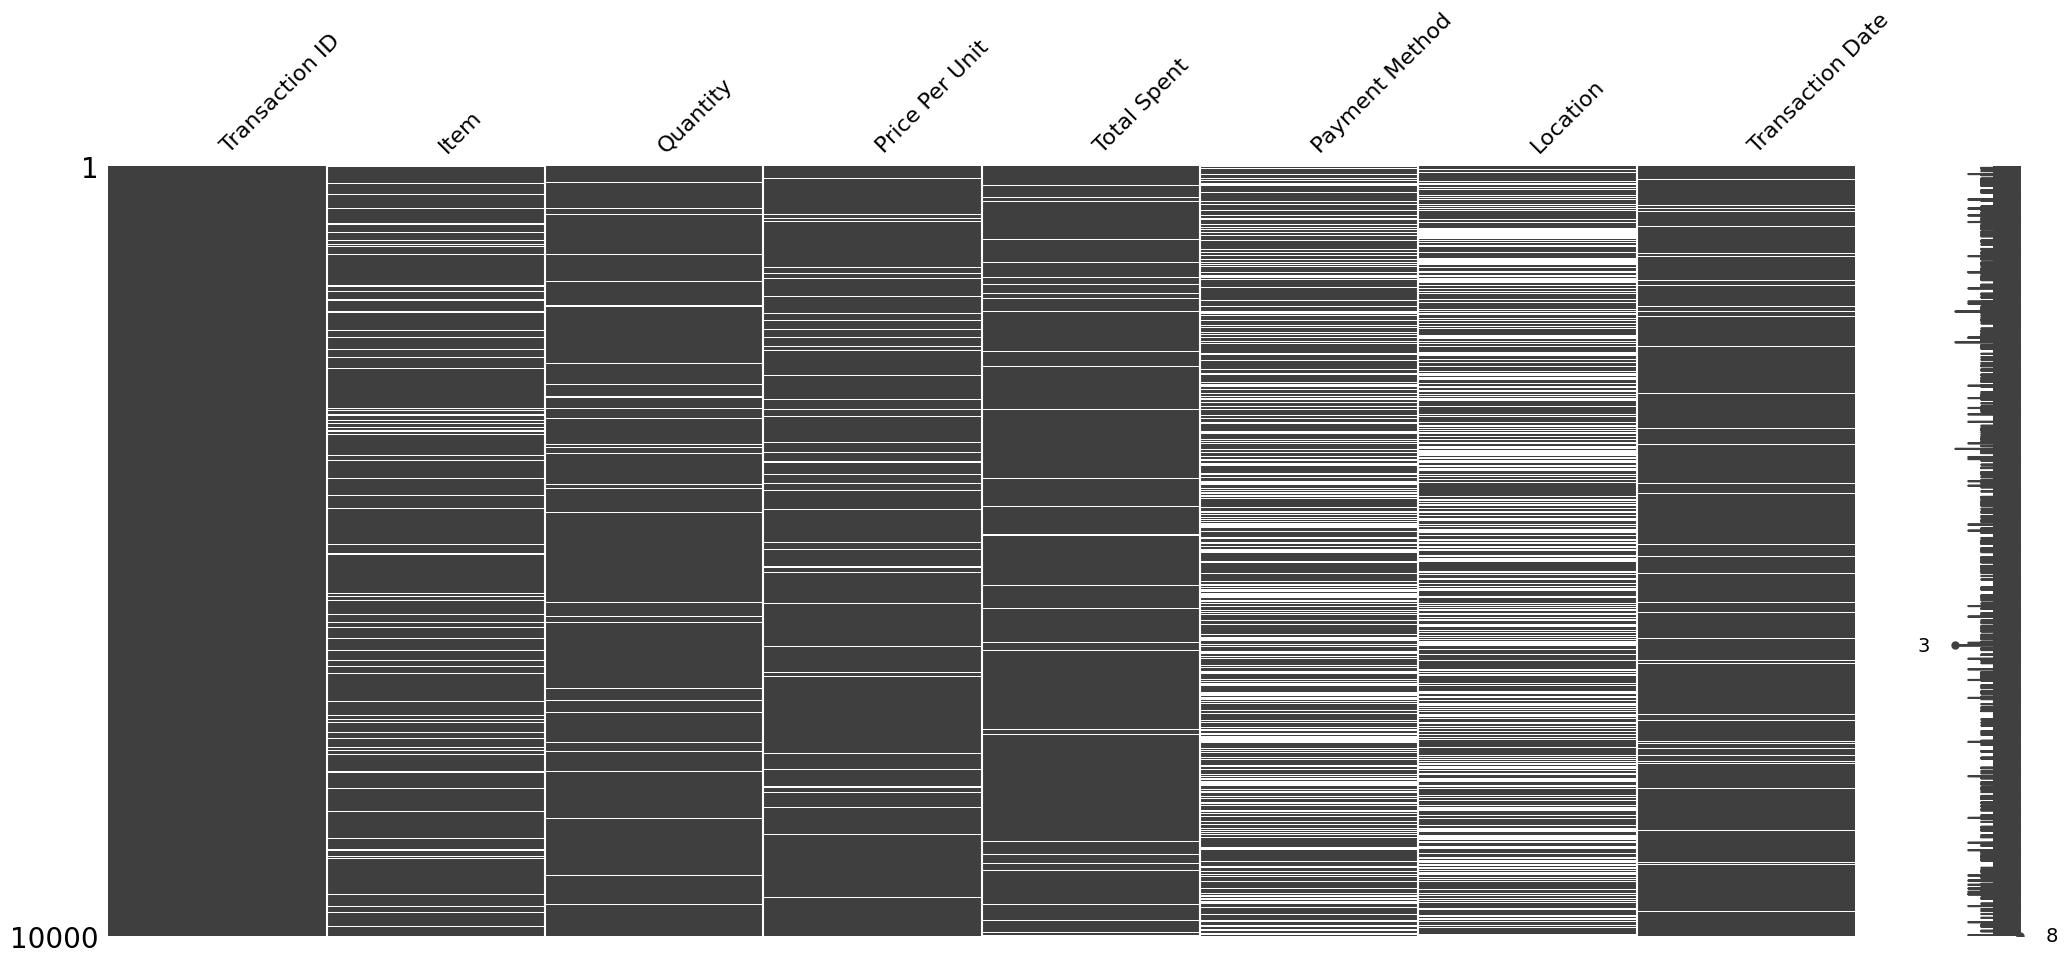

In [498]:
# Missingno matrix
missingno.matrix(df);

---

## **Filling Missing Values**

**1. Location column**

In [499]:
df["Location"].value_counts()

Location
Takeaway    3022
In-store    3017
Name: count, dtype: int64

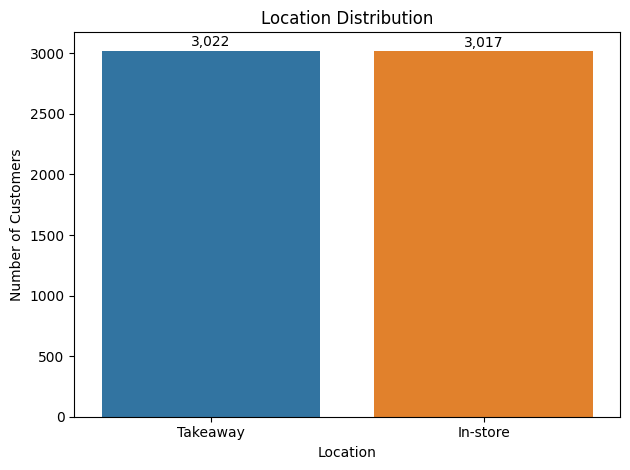

In [500]:
count_location = sns.countplot(data = df, x = "Location", hue = "Location")

for i in count_location.patches:
   count_location.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 20), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")
   
count_location.set_title("Location Distribution")

count_location.set(xlabel = "Location", ylabel = "Number of Customers")

count_location.get_legend().remove()

plt.tight_layout()
plt.show()

In [501]:
# Number of missing values before filling
df.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [502]:
# Filling missing values using backward fill method (bfill)
df["Location"] = df["Location"].fillna(method = "bfill")
df["Location"].unique()

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/1340956374.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Location"] = df["Location"].fillna(method = "bfill")


array(['Takeaway', 'In-store'], dtype=object)

In [503]:
# Number of missing values after filling
df.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location               0
Transaction Date     460
dtype: int64

In [504]:
df["Location"].value_counts()

Location
Takeaway    5049
In-store    4951
Name: count, dtype: int64

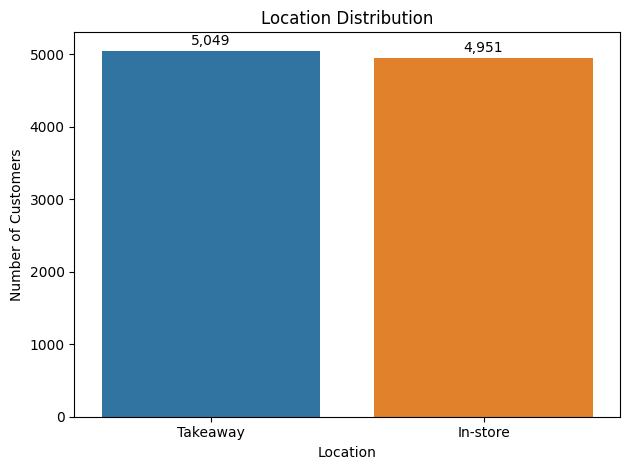

In [505]:
count_location = sns.countplot(data = df, x = "Location", hue = "Location")

for i in count_location.patches:
   count_location.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 20), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")
   
count_location.set_title("Location Distribution")

count_location.set(xlabel = "Location", ylabel = "Number of Customers")

plt.tight_layout()
plt.show()

---

**2. Payment Method**

In [506]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

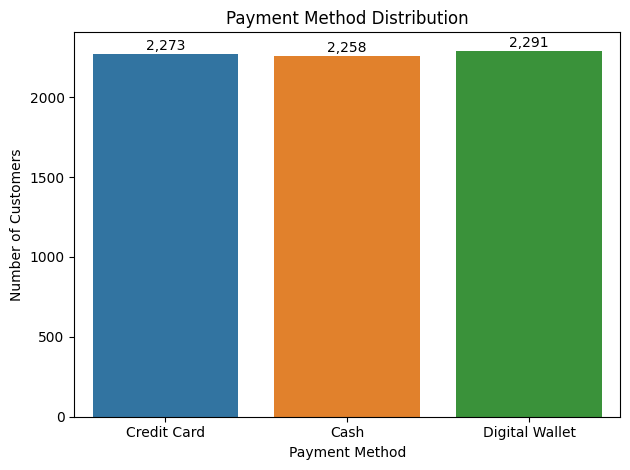

In [507]:
count_payment = sns.countplot(data = df, x = "Payment Method", hue = "Payment Method")

for i in count_payment.patches:
   count_payment.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 20), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")
   
count_payment.set_title("Payment Method Distribution")

count_payment.set(xlabel = "Payment Method", ylabel = "Number of Customers")

count_payment.get_legend().remove()

plt.tight_layout()
plt.show()

In [508]:
# Number of missing values before filling
df.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location               0
Transaction Date     460
dtype: int64

In [509]:
# Filling missing values using backward fill method (bfill)
df["Payment Method"] = df["Payment Method"].fillna(method = "bfill")
df["Payment Method"].unique()

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/949219427.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Payment Method"] = df["Payment Method"].fillna(method = "bfill")


array(['Credit Card', 'Cash', 'Digital Wallet'], dtype=object)

In [510]:
# Number of missing values after filling
df.isna().sum()

Transaction ID        0
Item                969
Quantity            479
Price Per Unit      533
Total Spent         502
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

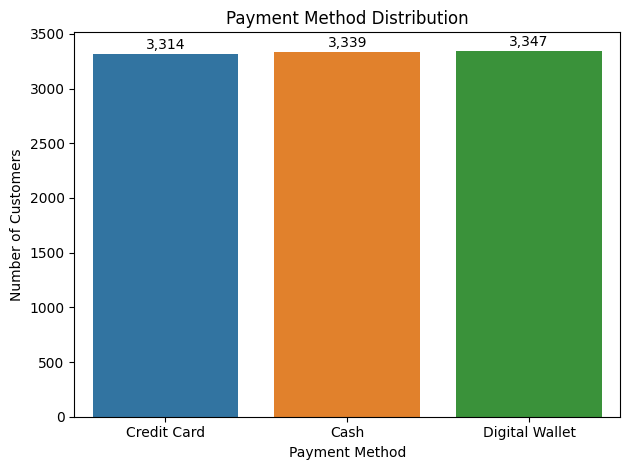

In [511]:
count_payment = sns.countplot(data = df, x = "Payment Method", hue = "Payment Method")

for i in count_payment.patches:
   count_payment.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 20), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")
   
count_payment.set_title("Payment Method Distribution")

count_payment.set(xlabel = "Payment Method", ylabel = "Number of Customers")

plt.tight_layout()
plt.show()

---

**3. Transaction Date**

In [512]:
df["Transaction Date"].unique()

<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 366, dtype: datetime64[ns]

In [513]:
# Number of missing values before filling
df.isna().sum()

Transaction ID        0
Item                969
Quantity            479
Price Per Unit      533
Total Spent         502
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

In [514]:
# Filling missing values using backward fill method (bfill)
df["Transaction Date"] = df["Transaction Date"].fillna(method = "bfill")
df["Transaction Date"].unique()

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/2661190338.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Transaction Date"] = df["Transaction Date"].fillna(method = "bfill")


<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 365, dtype: datetime64[ns]

In [515]:
# Number of missing values after filling
df.isna().sum()

Transaction ID        0
Item                969
Quantity            479
Price Per Unit      533
Total Spent         502
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

---

**4. Dropping rows with three or more missing values**

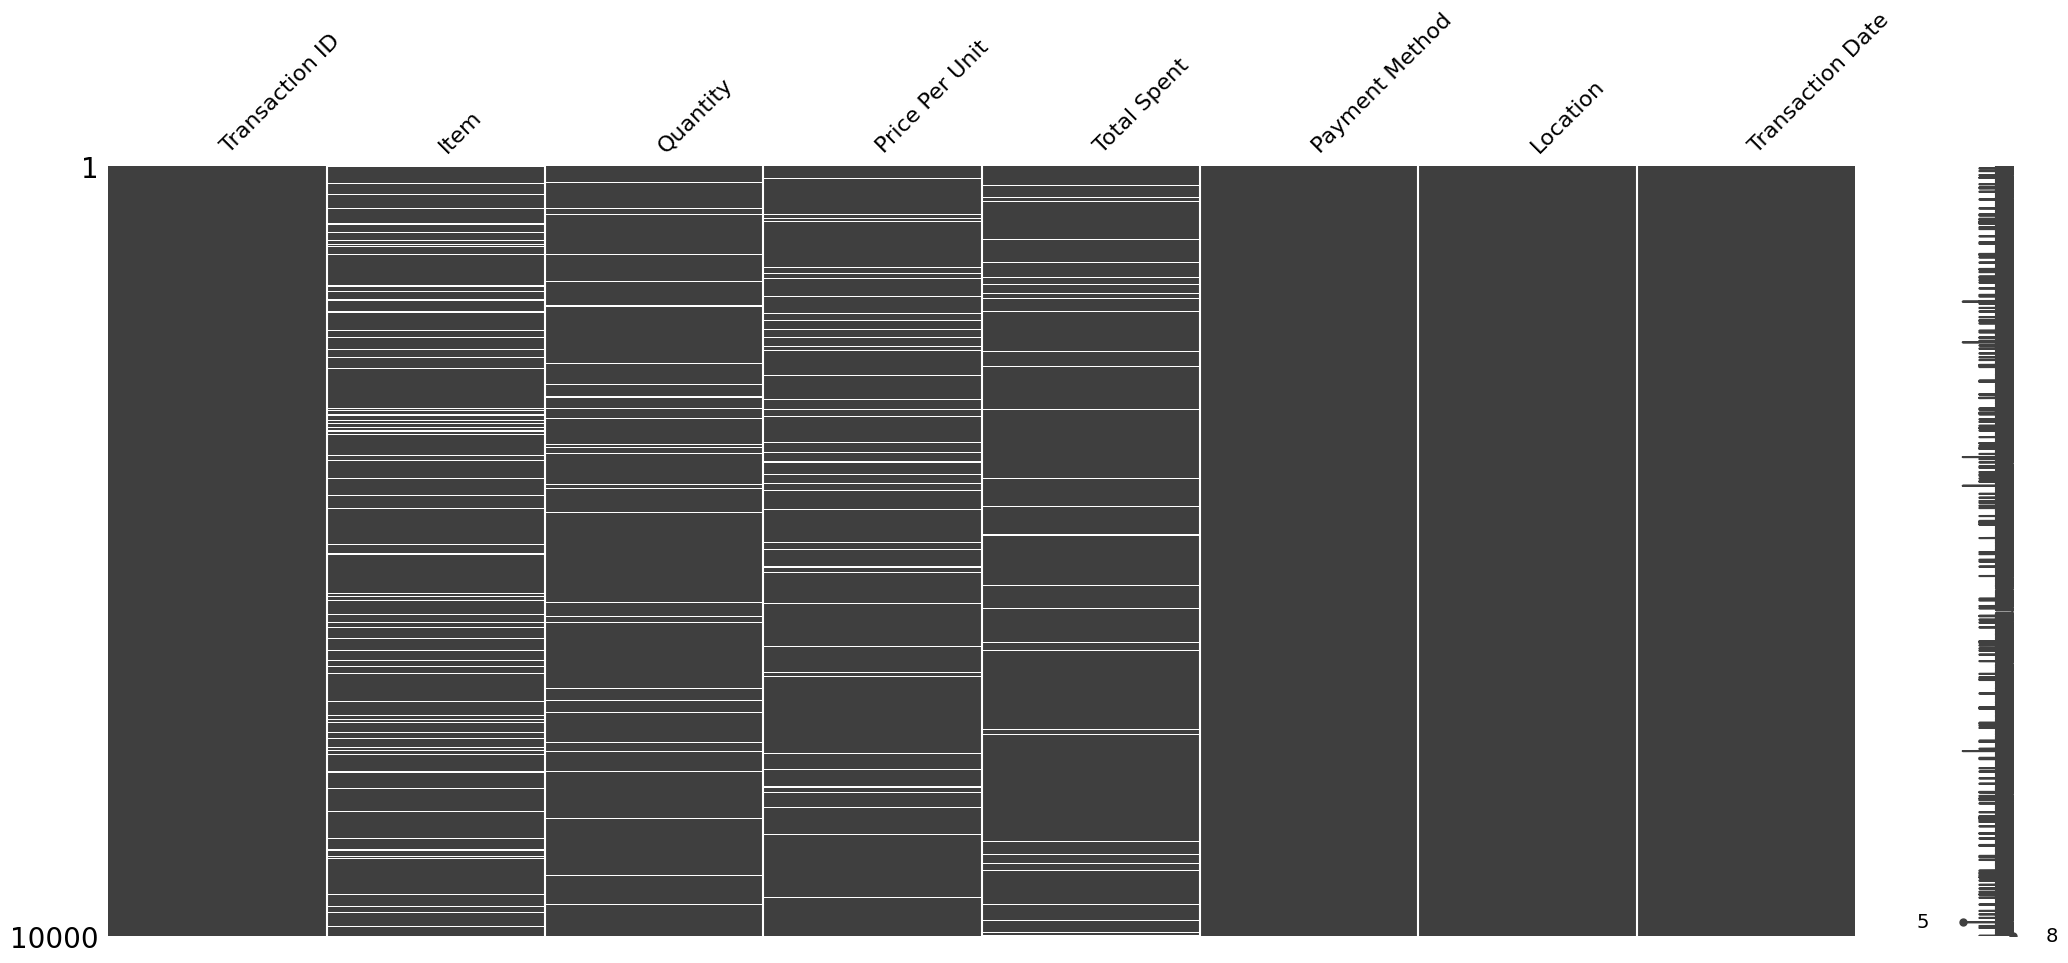

In [516]:
# Missingno matrix
missingno.matrix(df);

In [517]:
# Rows that have three or more missing values
df[df.isna().sum(axis = 1) >= 3]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,In-store,2023-02-09
2289,TXN_7524977,NaN,4.0,NaN,NaN,Credit Card,In-store,2023-12-09
3779,TXN_7376255,NaN,NaN,NaN,25.0,Digital Wallet,In-store,2023-05-27
4152,TXN_9646000,NaN,2.0,NaN,NaN,Cash,In-store,2023-12-14
7597,TXN_1082717,NaN,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,In-store,2023-08-19


In [518]:
# Dropping rows that have three or more missing values
df.drop(df[df.isna().sum(axis = 1) >= 3].index, inplace = True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,In-store,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,In-store,2023-12-02


In [519]:
# Number of missing values after dropping rows
df.isna().sum()

Transaction ID        0
Item                963
Quantity            476
Price Per Unit      527
Total Spent         499
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

---

**5. Dropping rows that have missing values in both Item & Price Per Unit**

- Item --> Price Per Unit

In [520]:
# Rows that have missing values in both 'Item' and 'Price Per Unit' columns
df[(df["Item"].isna()) & (df["Price Per Unit"].isna())]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
118,TXN_4633784,NaN,5.0,NaN,15.0,Credit Card,In-store,2023-02-06
151,TXN_4031509,NaN,4.0,NaN,16.0,Credit Card,Takeaway,2023-01-04
289,TXN_3495950,NaN,4.0,NaN,6.0,Credit Card,In-store,2023-02-19
334,TXN_2523298,NaN,4.0,NaN,6.0,Digital Wallet,In-store,2023-03-25
550,TXN_4186681,NaN,4.0,NaN,6.0,Digital Wallet,Takeaway,2023-05-24
750,TXN_5787508,NaN,3.0,NaN,9.0,Credit Card,Takeaway,2023-07-23
818,TXN_7940202,NaN,1.0,NaN,4.0,Digital Wallet,In-store,2023-07-23
1154,TXN_2473090,NaN,2.0,NaN,3.0,Credit Card,In-store,2023-03-03
1337,TXN_5031214,NaN,5.0,NaN,5.0,Cash,Takeaway,2023-07-29
1377,TXN_8396271,NaN,2.0,NaN,2.0,Credit Card,Takeaway,2023-09-12


In [521]:
# Dropping rows that have missing values in both 'Item' and 'Price Per Unit' columns
df.drop(df[(df["Item"].isna()) & (df["Price Per Unit"].isna())].index, inplace = True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9994,TXN_7851634,NaN,4.0,4.0,16.0,Digital Wallet,In-store,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,In-store,2023-12-02


---

**6. Dropping rows that have missing values in both Quantity & Total Spent**

- Total Spent --> Quantity * Price Per Unit

In [522]:
# Rows that have missing values in both 'Quantity' and 'Price Per Unit' columns
df[(df["Quantity"].isna()) & (df["Total Spent"].isna())]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,Digital Wallet,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,Credit Card,In-store,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,Cash,Takeaway,2023-05-14
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,Takeaway,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,Cash,Takeaway,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
4257,TXN_6470865,Coffee,NaN,2.0,NaN,Digital Wallet,Takeaway,2023-09-18
5841,TXN_5884081,Cookie,NaN,1.0,NaN,Digital Wallet,In-store,2023-07-05


In [523]:
# Dropping rows that have missing values in both 'Quantity' and 'Price Per Unit' columns
df.drop(df[(df["Quantity"].isna()) & (df["Total Spent"].isna())].index, inplace = True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9994,TXN_7851634,NaN,4.0,4.0,16.0,Digital Wallet,In-store,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,In-store,2023-12-02


In [524]:
# Rows that have missing values in both 'Price Per Unit' and 'Total Spent' columns
df[(df["Price Per Unit"].isna()) & (df["Total Spent"].isna())]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,NaN,NaN,Cash,In-store,2023-10-20
1674,TXN_9367492,Tea,2.0,NaN,NaN,Cash,In-store,2023-06-19
2229,TXN_8498613,Sandwich,2.0,NaN,NaN,Credit Card,Takeaway,2023-11-08
2585,TXN_1259340,Tea,3.0,NaN,NaN,Digital Wallet,Takeaway,2023-02-24
3162,TXN_3577949,Cake,3.0,NaN,NaN,Digital Wallet,Takeaway,2023-04-25
3598,TXN_2857444,Smoothie,1.0,NaN,NaN,Cash,Takeaway,2023-05-10
3673,TXN_6500126,Smoothie,2.0,NaN,NaN,Cash,Takeaway,2023-06-17
4021,TXN_6424202,Cookie,2.0,NaN,NaN,Credit Card,In-store,2023-11-20
7035,TXN_8872984,Salad,5.0,NaN,NaN,Credit Card,In-store,2023-08-23
7230,TXN_5118799,Cookie,2.0,NaN,NaN,Cash,Takeaway,2023-04-23


In [525]:
# Rows that have missing values in both 'Price Per Unit' and 'Quantity' columns
df[(df["Price Per Unit"].isna()) & (df["Quantity"].isna())]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
912,TXN_1575608,Sandwich,NaN,NaN,20.0,Credit Card,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,2023-06-30
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,In-store,2023-03-05
2330,TXN_3849488,Salad,NaN,NaN,5.0,Credit Card,In-store,2023-03-01
3635,TXN_6177081,Cookie,NaN,NaN,1.0,Cash,In-store,2023-07-26
5639,TXN_6206792,Tea,NaN,NaN,6.0,Credit Card,In-store,2023-10-13
5845,TXN_8388462,Smoothie,NaN,NaN,8.0,Cash,Takeaway,2023-08-19
6225,TXN_6859249,Cookie,NaN,NaN,2.0,Digital Wallet,In-store,2023-04-11


'Price Per Unit' column can be filled, then the 'Total Spent' column can be filled by multiplying 'Price Per Unit' and 'Quantity' and the 'Quantity' column can be filled by dividing 'Total Spent' by 'Price Per Unit'.

In [526]:
# Number of missing values after dropping
df.isna().sum()

Transaction ID        0
Item                915
Quantity            456
Price Per Unit      479
Total Spent         479
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

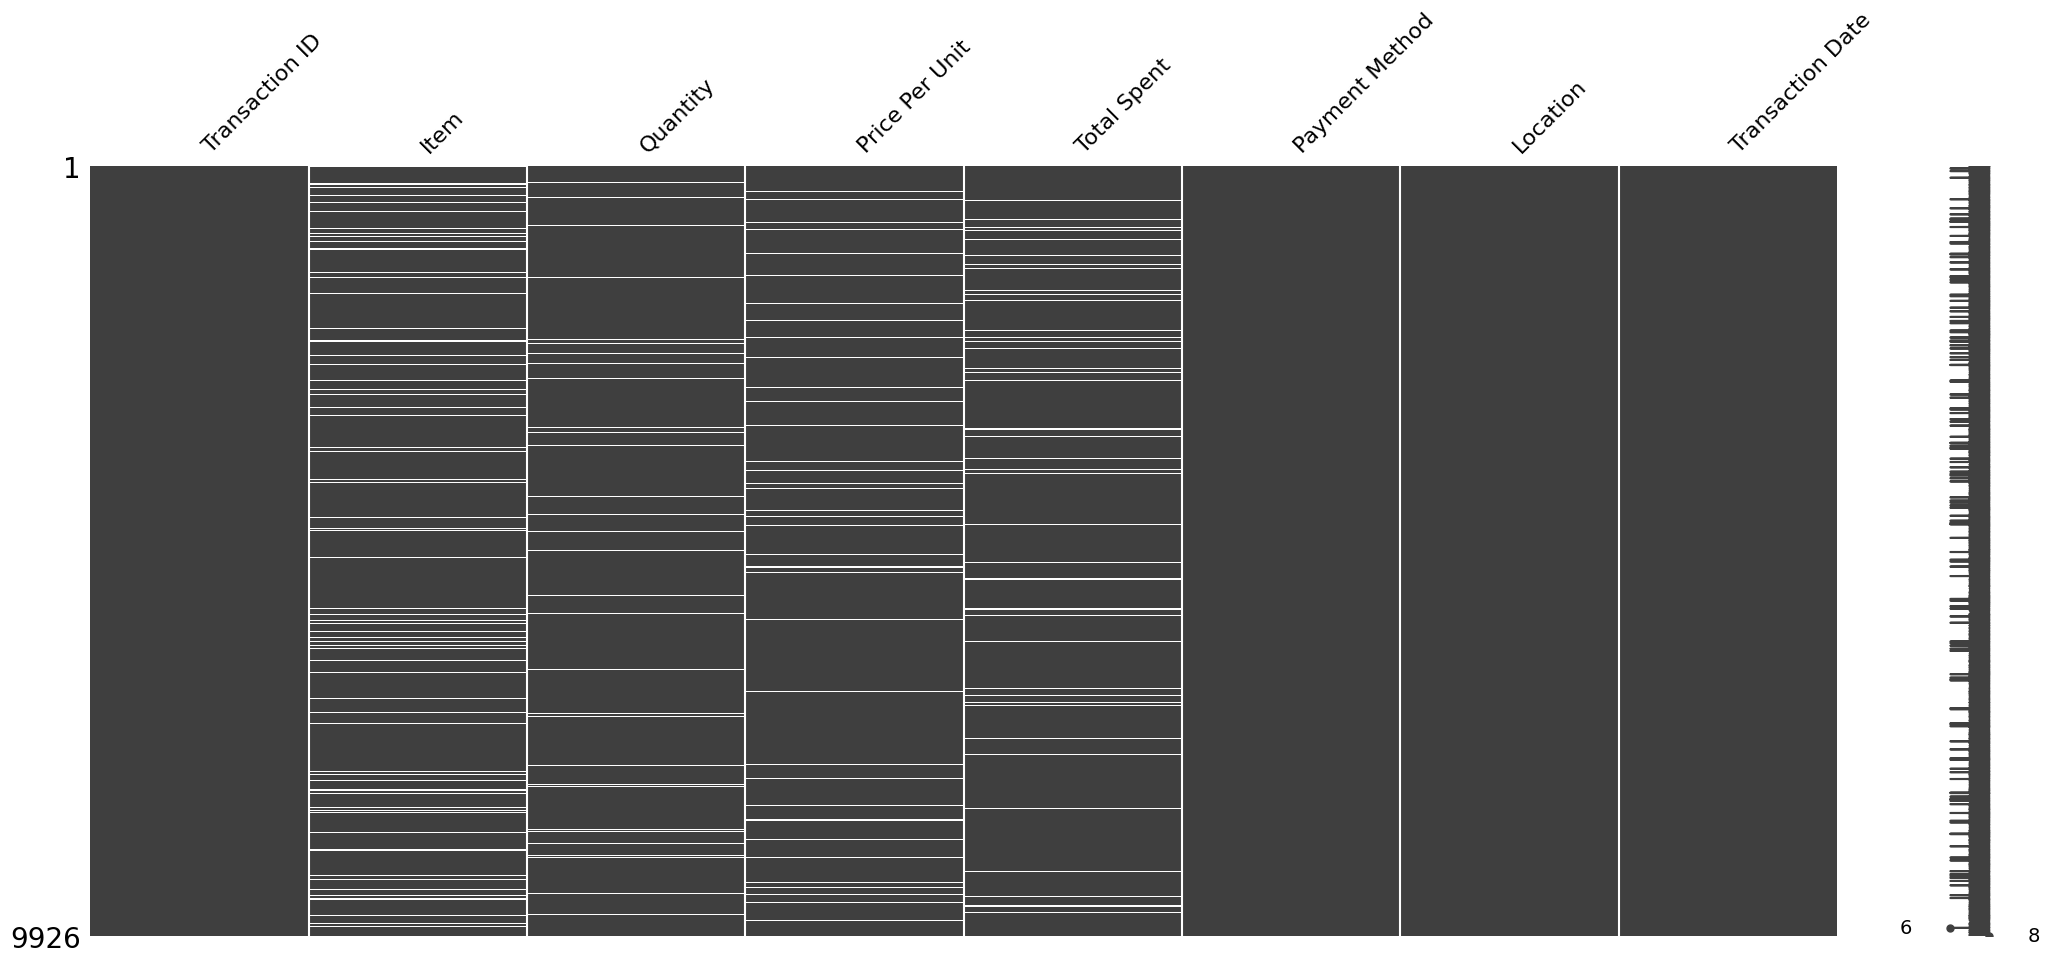

In [527]:
# Missingno matrix
missingno.matrix(df);

---

**7. Filling the Price Per Unit column**

In [528]:
# Rows that have missing values in 'Price Per Unit' column
null_price = df[df["Price Per Unit"].isna()]
null_price

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
56,TXN_3578141,Cake,5.0,NaN,15.0,Digital Wallet,Takeaway,2023-06-27
65,TXN_4987129,Sandwich,3.0,NaN,NaN,Cash,In-store,2023-10-20
68,TXN_8427104,Salad,2.0,NaN,10.0,Digital Wallet,In-store,2023-10-27
85,TXN_8035512,Tea,3.0,NaN,4.5,Cash,Takeaway,2023-10-29
104,TXN_7447872,Juice,2.0,NaN,6.0,Credit Card,In-store,2023-02-25
...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,NaN,NaN,Digital Wallet,Takeaway,2023-02-02
9924,TXN_5981429,Juice,2.0,NaN,6.0,Digital Wallet,Takeaway,2023-12-24
9926,TXN_2464706,Cake,4.0,NaN,12.0,Digital Wallet,Takeaway,2023-11-09
9961,TXN_2153100,Tea,2.0,NaN,3.0,Cash,In-store,2023-12-29


In [529]:
# Temporary DataFrame used as a reference to fill empty 'Price' column
fill_price = df[["Item", "Price Per Unit"]].drop_duplicates().dropna()
fill_price 

,Item,Price Per Unit
0,Coffee,2.0
1,Cake,3.0
2,Cookie,1.0
3,Salad,5.0
5,Smoothie,4.0
7,Sandwich,4.0
17,Juice,3.0
42,Tea,1.5


In [530]:
# Performing a merge between 'null_price' DataFrame and 'fill_price' DataFrame to fill missing values in the 'Price Per Unit' column
filled_price = pd.merge(null_price, fill_price, how = "left", on = "Item").set_index(null_price.index)
filled_price

,Transaction ID,Item,Quantity,Price Per Unit_x,Total Spent,Payment Method,Location,Transaction Date,Price Per Unit_y
56,TXN_3578141,Cake,5.0,NaN,15.0,Digital Wallet,Takeaway,2023-06-27,3.0
65,TXN_4987129,Sandwich,3.0,NaN,NaN,Cash,In-store,2023-10-20,4.0
68,TXN_8427104,Salad,2.0,NaN,10.0,Digital Wallet,In-store,2023-10-27,5.0
85,TXN_8035512,Tea,3.0,NaN,4.5,Cash,Takeaway,2023-10-29,1.5
104,TXN_7447872,Juice,2.0,NaN,6.0,Credit Card,In-store,2023-02-25,3.0
...,...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,NaN,NaN,Digital Wallet,Takeaway,2023-02-02,3.0
9924,TXN_5981429,Juice,2.0,NaN,6.0,Digital Wallet,Takeaway,2023-12-24,3.0
9926,TXN_2464706,Cake,4.0,NaN,12.0,Digital Wallet,Takeaway,2023-11-09,3.0
9961,TXN_2153100,Tea,2.0,NaN,3.0,Cash,In-store,2023-12-29,1.5


In [531]:
# Filling missing values in the 'Price Per Unit' column 
null_price.fillna({"Price Per Unit" : filled_price["Price Per Unit_y"]}, inplace = True)
null_price

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/874216951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_price.fillna({"Price Per Unit" : filled_price["Price Per Unit_y"]}, inplace = True)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
56,TXN_3578141,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-06-27
65,TXN_4987129,Sandwich,3.0,4.0,NaN,Cash,In-store,2023-10-20
68,TXN_8427104,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-10-27
85,TXN_8035512,Tea,3.0,1.5,4.5,Cash,Takeaway,2023-10-29
104,TXN_7447872,Juice,2.0,3.0,6.0,Credit Card,In-store,2023-02-25
...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,3.0,NaN,Digital Wallet,Takeaway,2023-02-02
9924,TXN_5981429,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-12-24
9926,TXN_2464706,Cake,4.0,3.0,12.0,Digital Wallet,Takeaway,2023-11-09
9961,TXN_2153100,Tea,2.0,1.5,3.0,Cash,In-store,2023-12-29


In [532]:
# Filling the 'Total Spent' column by multiplying the 'Quantity' column with the 'Price Per Unit' column  
null_price["Total Spent"] = null_price["Quantity"] * null_price["Price Per Unit"]
null_price

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/3296119904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_price["Total Spent"] = null_price["Quantity"] * null_price["Price Per Unit"]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
56,TXN_3578141,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-06-27
65,TXN_4987129,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-10-20
68,TXN_8427104,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-10-27
85,TXN_8035512,Tea,3.0,1.5,4.5,Cash,Takeaway,2023-10-29
104,TXN_7447872,Juice,2.0,3.0,6.0,Credit Card,In-store,2023-02-25
...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-02-02
9924,TXN_5981429,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-12-24
9926,TXN_2464706,Cake,4.0,3.0,12.0,Digital Wallet,Takeaway,2023-11-09
9961,TXN_2153100,Tea,2.0,1.5,3.0,Cash,In-store,2023-12-29


In [533]:
# Substituting the primary DataFrame with the temporary DataFrame that has been filled (null_price)
df[df["Price Per Unit"].isna()] = null_price
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9994,TXN_7851634,NaN,4.0,4.0,16.0,Digital Wallet,In-store,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [534]:
# Number of missing values after filling the 'Price Per Unit' column
df.isna().sum()

Transaction ID        0
Item                915
Quantity            456
Price Per Unit        0
Total Spent         477
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

---

**8. Filling the Item column**

In [535]:
# Temporary DataFrame used as a reference to fill empty 'Item' column
fill_item = df[["Item", "Price Per Unit"]].drop_duplicates().dropna()
fill_item

,Item,Price Per Unit
0,Coffee,2.0
1,Cake,3.0
2,Cookie,1.0
3,Salad,5.0
5,Smoothie,4.0
7,Sandwich,4.0
17,Juice,3.0
42,Tea,1.5


In [536]:
# There are 4 items that have duplicated 'Price Per Unit' (Sandwich & Smoothie, Juice & Cake)
fill_item[fill_item.duplicated(subset = "Price Per Unit")]

,Item,Price Per Unit
7,Sandwich,4.0
17,Juice,3.0


In [537]:
# Rows that have missing values where 'Price Per Unit' equals 3 or 4 
df[(df["Item"].isna()) & ((df["Price Per Unit"] == 3) | (df["Price Per Unit"] == 4))]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,NaN,3.0,3.0,9.0,Cash,Takeaway,2023-10-06
8,TXN_4717867,NaN,5.0,3.0,15.0,Cash,Takeaway,2023-07-28
36,TXN_6855453,NaN,4.0,3.0,12.0,Credit Card,In-store,2023-07-17
61,TXN_8051289,NaN,1.0,3.0,3.0,Cash,In-store,2023-10-09
69,TXN_8471743,NaN,5.0,3.0,15.0,Digital Wallet,In-store,2023-04-06
...,...,...,...,...,...,...,...,...
9910,TXN_2338617,NaN,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-01-12
9918,TXN_2292088,NaN,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9946,TXN_8807600,NaN,1.0,4.0,4.0,Cash,Takeaway,2023-09-24
9981,TXN_4583012,NaN,5.0,4.0,20.0,Digital Wallet,Takeaway,2023-02-27


In [538]:
# Dropping rows that have missing values where 'Price Per Unit' equals 3 or 4 
# Reason: to mitigate ambiguity
df.drop(df[(df["Item"].isna()) & ((df["Price Per Unit"] == 3) | (df["Price Per Unit"] == 4))].index, inplace = True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [539]:
df.isna().sum()

Transaction ID        0
Item                468
Quantity            432
Price Per Unit        0
Total Spent         455
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

In [540]:
# Rows that have missing values in 'Item' column
null_item = df[df["Item"].isna()]
null_item 

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,NaN,2.0,1.5,3.0,Credit Card,In-store,2023-03-21
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,In-store,2023-06-02
31,TXN_8927252,NaN,2.0,1.0,NaN,Credit Card,In-store,2023-11-06
33,TXN_7710508,NaN,5.0,1.0,5.0,Cash,Takeaway,2023-10-09
52,TXN_8914892,NaN,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-15
...,...,...,...,...,...,...,...,...
9855,TXN_3740505,NaN,2.0,1.5,3.0,Cash,In-store,2023-11-21
9865,TXN_4071743,NaN,5.0,2.0,10.0,Cash,Takeaway,2023-07-06
9876,TXN_3105633,NaN,1.0,2.0,2.0,Digital Wallet,In-store,2023-03-30
9951,TXN_4122925,NaN,4.0,1.0,4.0,Digital Wallet,Takeaway,2023-10-20


In [541]:
# Performing a merge between 'null_item' DataFrame and 'fill_item' DataFrame to fill missing values in the 'Item' column
filled_item = pd.merge(null_item, fill_item, how = "left", on = "Price Per Unit").set_index(null_item.index)
filled_item 

,Transaction ID,Item_x,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_y
14,TXN_8915701,NaN,2.0,1.5,3.0,Credit Card,In-store,2023-03-21,Tea
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,In-store,2023-06-02,Coffee
31,TXN_8927252,NaN,2.0,1.0,NaN,Credit Card,In-store,2023-11-06,Cookie
33,TXN_7710508,NaN,5.0,1.0,5.0,Cash,Takeaway,2023-10-09,Cookie
52,TXN_8914892,NaN,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-15,Salad
...,...,...,...,...,...,...,...,...,...
9855,TXN_3740505,NaN,2.0,1.5,3.0,Cash,In-store,2023-11-21,Tea
9865,TXN_4071743,NaN,5.0,2.0,10.0,Cash,Takeaway,2023-07-06,Coffee
9876,TXN_3105633,NaN,1.0,2.0,2.0,Digital Wallet,In-store,2023-03-30,Coffee
9951,TXN_4122925,NaN,4.0,1.0,4.0,Digital Wallet,Takeaway,2023-10-20,Cookie


In [542]:
# Filling missing values in the 'Item' column 
null_item.fillna({"Item" : filled_item["Item_y"]}, inplace = True)
null_item

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/1004717949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_item.fillna({"Item" : filled_item["Item_y"]}, inplace = True)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,Tea,2.0,1.5,3.0,Credit Card,In-store,2023-03-21
30,TXN_1736287,Coffee,5.0,2.0,10.0,Digital Wallet,In-store,2023-06-02
31,TXN_8927252,Cookie,2.0,1.0,NaN,Credit Card,In-store,2023-11-06
33,TXN_7710508,Cookie,5.0,1.0,5.0,Cash,Takeaway,2023-10-09
52,TXN_8914892,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-15
...,...,...,...,...,...,...,...,...
9855,TXN_3740505,Tea,2.0,1.5,3.0,Cash,In-store,2023-11-21
9865,TXN_4071743,Coffee,5.0,2.0,10.0,Cash,Takeaway,2023-07-06
9876,TXN_3105633,Coffee,1.0,2.0,2.0,Digital Wallet,In-store,2023-03-30
9951,TXN_4122925,Cookie,4.0,1.0,4.0,Digital Wallet,Takeaway,2023-10-20


In [543]:
# Substituting the primary DataFrame with the temporary DataFrame that has been filled (null_item)
df[df["Item"].isna()] = null_item
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [544]:
# Number of missing values after filling the 'Item' column
df.isna().sum()

Transaction ID        0
Item                  0
Quantity            432
Price Per Unit        0
Total Spent         455
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

---

**9. Filling the Quantity column**

In [545]:
# Rows that have missing values in 'Quantity' column
null_quantity = df[df["Quantity"].isna()]
null_quantity

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,NaN,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,NaN,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,NaN,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,Takeaway,2023-03-30
117,TXN_2148617,Juice,NaN,3.0,9.0,Digital Wallet,In-store,2023-01-10
...,...,...,...,...,...,...,...,...
9932,TXN_8502079,Tea,NaN,1.5,3.0,Cash,Takeaway,2023-04-20
9935,TXN_9778251,Tea,NaN,1.5,6.0,Cash,Takeaway,2023-11-09
9944,TXN_7495283,Cake,NaN,3.0,15.0,Credit Card,Takeaway,2023-04-14
9957,TXN_6487003,Coffee,NaN,2.0,8.0,Credit Card,Takeaway,2023-11-15


In [546]:
# Filling missing values in the 'Quantity' column 
null_quantity["Quantity"] = df["Total Spent"] / df["Price Per Unit"]
null_quantity

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/1397313655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_quantity["Quantity"] = df["Total Spent"] / df["Price Per Unit"]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,2.0,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,1.0,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,2.0,3.0,6.0,Cash,Takeaway,2023-03-30
117,TXN_2148617,Juice,3.0,3.0,9.0,Digital Wallet,In-store,2023-01-10
...,...,...,...,...,...,...,...,...
9932,TXN_8502079,Tea,2.0,1.5,3.0,Cash,Takeaway,2023-04-20
9935,TXN_9778251,Tea,4.0,1.5,6.0,Cash,Takeaway,2023-11-09
9944,TXN_7495283,Cake,5.0,3.0,15.0,Credit Card,Takeaway,2023-04-14
9957,TXN_6487003,Coffee,4.0,2.0,8.0,Credit Card,Takeaway,2023-11-15


In [547]:
# Substituting the primary DataFrame with the temporary DataFrame that has been filled (null_quantity)
df[df["Quantity"].isna()] = null_quantity
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


---

**10. Filling the Total Spent column**

In [548]:
# Rows that have missing values in 'Total Spent' column
null_spent = df[df["Total Spent"].isna()]
null_spent

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,NaN,Credit Card,In-store,2023-12-13
31,TXN_8927252,Cookie,2.0,1.0,NaN,Credit Card,In-store,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,NaN,Cash,Takeaway,2023-01-10
94,TXN_6289610,Juice,3.0,3.0,NaN,Cash,Takeaway,2023-08-07
...,...,...,...,...,...,...,...,...
9890,TXN_2749289,Smoothie,2.0,4.0,NaN,Digital Wallet,Takeaway,2023-05-05
9954,TXN_1191659,Coffee,4.0,2.0,NaN,Credit Card,In-store,2023-11-21
9977,TXN_5548914,Juice,2.0,3.0,NaN,Digital Wallet,In-store,2023-11-04
9988,TXN_9594133,Cake,5.0,3.0,NaN,Cash,Takeaway,2023-08-18


In [549]:
# Filling missing values in the 'Total Spent' column 
null_spent["Total Spent"] = null_spent["Quantity"] * null_spent["Price Per Unit"]
null_spent

/var/folders/c6/wdyfjw2j4wncqp67s4mfxbmc0000gq/T/ipykernel_28839/3850043838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_spent["Total Spent"] = null_spent["Quantity"] * null_spent["Price Per Unit"]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,12.0,Credit Card,In-store,2023-12-13
31,TXN_8927252,Cookie,2.0,1.0,2.0,Credit Card,In-store,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,3.0,Cash,Takeaway,2023-01-10
94,TXN_6289610,Juice,3.0,3.0,9.0,Cash,Takeaway,2023-08-07
...,...,...,...,...,...,...,...,...
9890,TXN_2749289,Smoothie,2.0,4.0,8.0,Digital Wallet,Takeaway,2023-05-05
9954,TXN_1191659,Coffee,4.0,2.0,8.0,Credit Card,In-store,2023-11-21
9977,TXN_5548914,Juice,2.0,3.0,6.0,Digital Wallet,In-store,2023-11-04
9988,TXN_9594133,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-08-18


In [550]:
# Substituting the primary DataFrame with the temporary DataFrame that has been filled (null_spent)
df[df["Total Spent"].isna()] = null_spent
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [551]:
# Number of missing values after filling the 'Total Spent' column
df.isna().sum()

Transaction ID       0
Item                 0
Quantity            15
Price Per Unit       0
Total Spent         15
Payment Method       0
Location             0
Transaction Date     0
dtype: int64

---

**11. Dropping rows that have missing values in both Quantity & Total Spent**

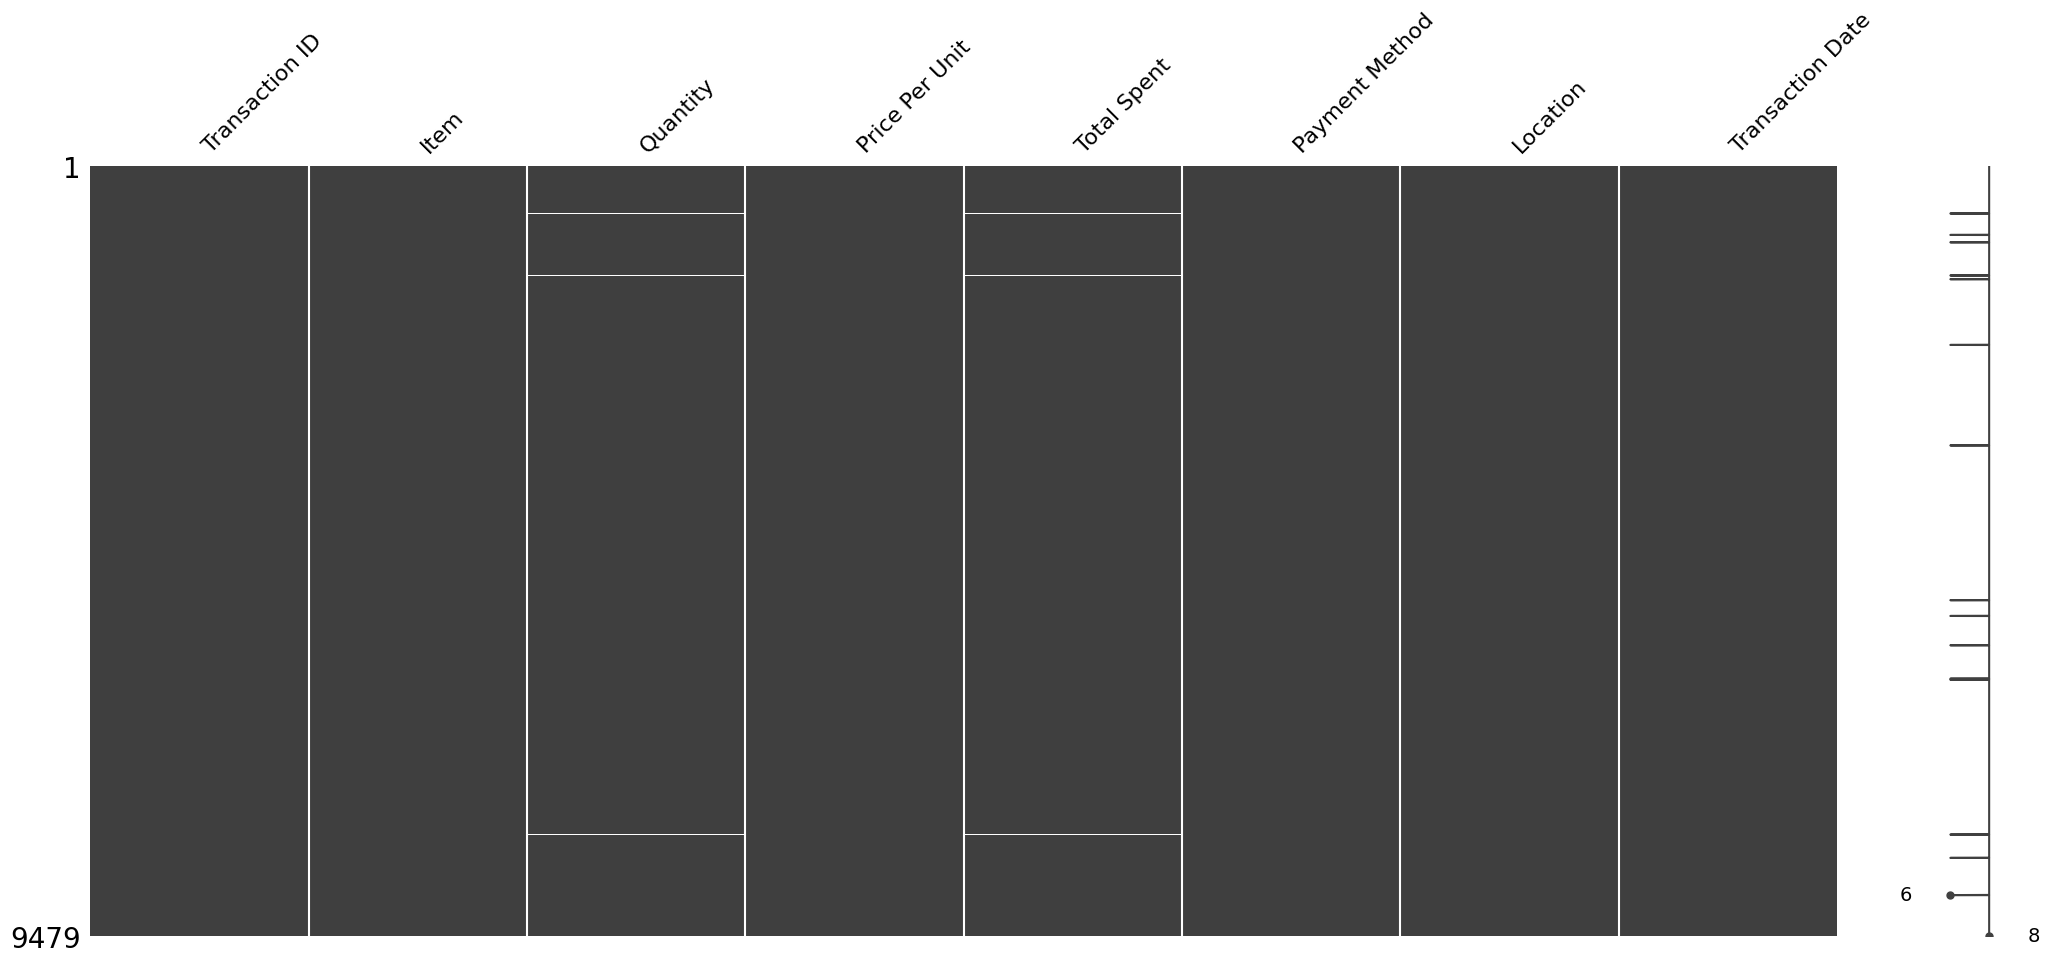

In [552]:
# Missingno matrix
missingno.matrix(df);

The missingno matrix above shows that rows with missing values in both the 'Quantity' and 'Total Spent' columns are in the same rows.

In [553]:
# Rows that have missing values in both 'Quantity' and 'Price Per Unit' columns
df[(df["Quantity"].isna()) & (df["Total Spent"].isna())]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
629,TXN_9289174,Cake,NaN,3.0,NaN,Digital Wallet,In-store,2023-12-30
912,TXN_1575608,Sandwich,NaN,4.0,NaN,Credit Card,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,1.5,NaN,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,1.5,NaN,Cash,Takeaway,2023-06-30
1482,TXN_3593060,Smoothie,NaN,4.0,NaN,Cash,In-store,2023-03-05
2330,TXN_3849488,Salad,NaN,5.0,NaN,Credit Card,In-store,2023-03-01
3635,TXN_6177081,Cookie,NaN,1.0,NaN,Cash,In-store,2023-07-26
5639,TXN_6206792,Tea,NaN,1.5,NaN,Credit Card,In-store,2023-10-13
5845,TXN_8388462,Smoothie,NaN,4.0,NaN,Cash,Takeaway,2023-08-19
6225,TXN_6859249,Cookie,NaN,1.0,NaN,Digital Wallet,In-store,2023-04-11


In [554]:
# Dropping rows that have missing values in both 'Quantity' and 'Price Per Unit' columns
df.drop(df[(df["Quantity"].isna()) & (df["Total Spent"].isna())].index, inplace =  True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [555]:
# Number of missing values
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

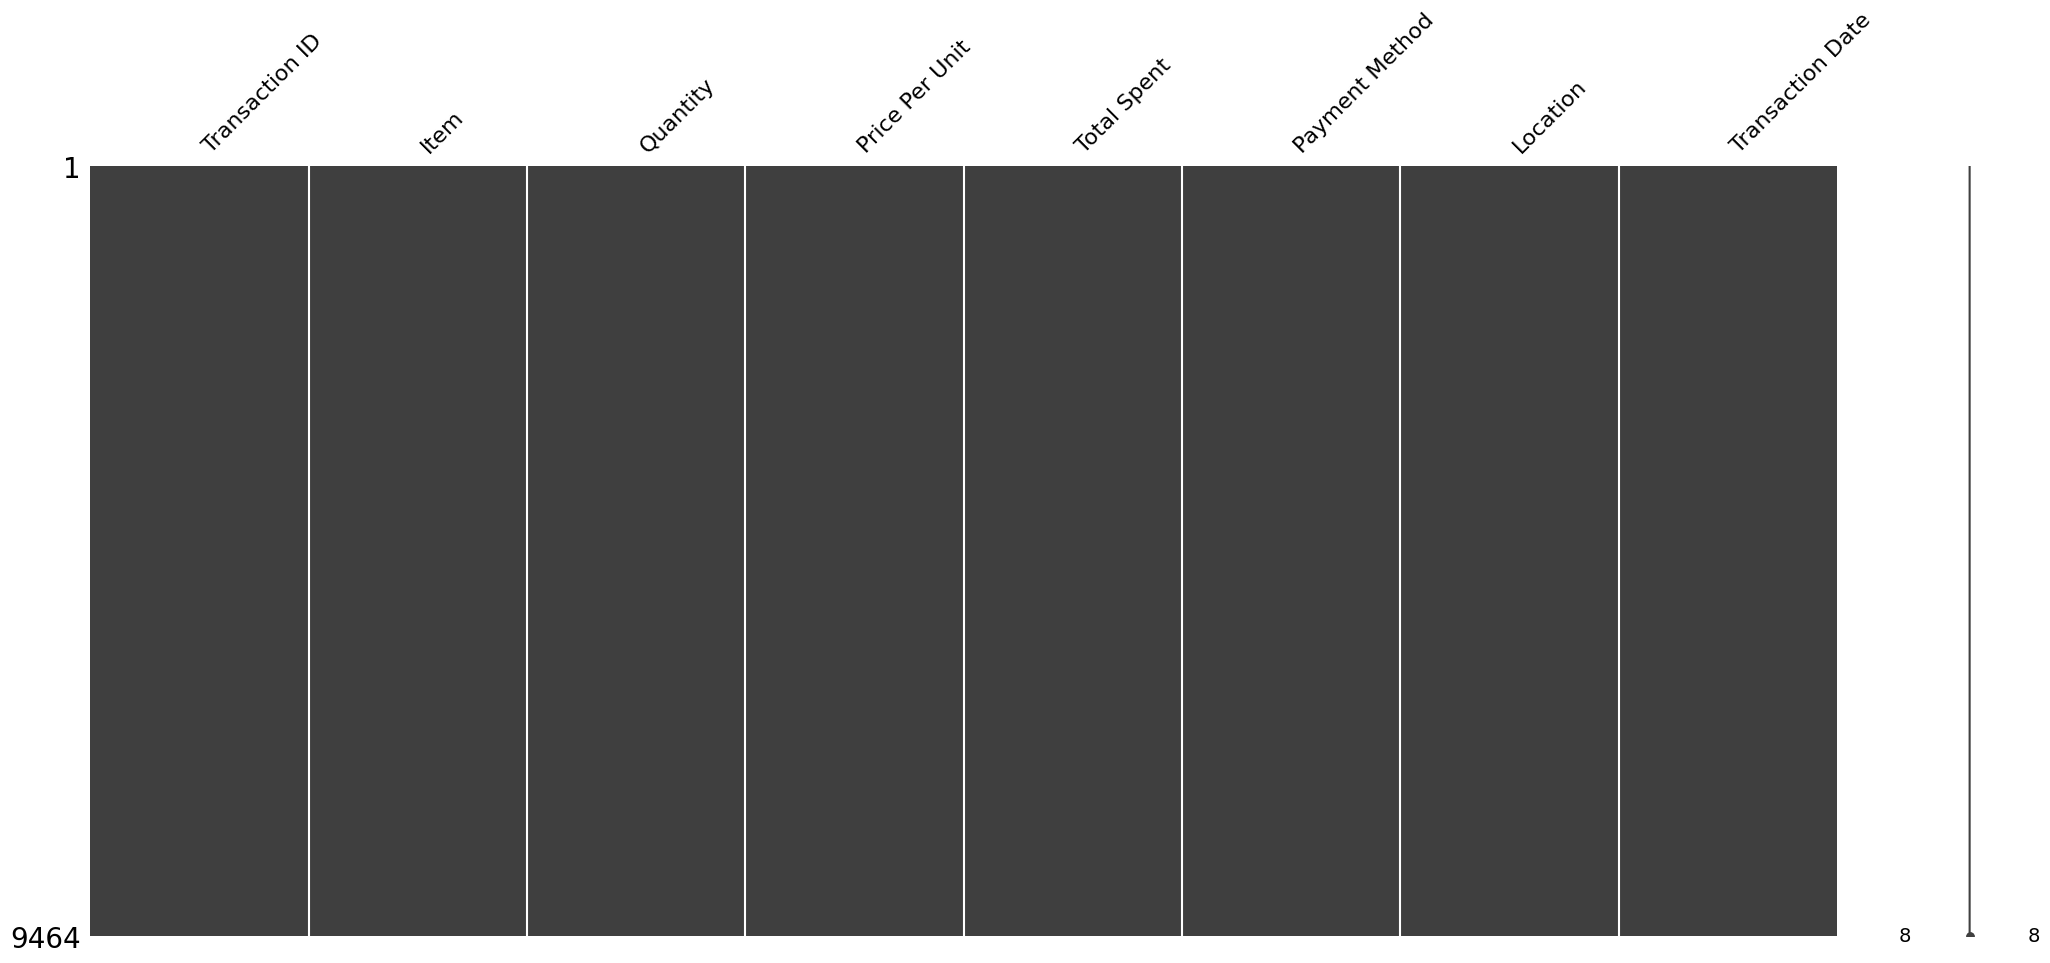

In [556]:
# Missingno matrix
missingno.matrix(df);

The missingno above shows that there are no rows with missing values.

---

**12. Resetting the index**

In [557]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


In [558]:
df.reset_index(drop = True, inplace = True)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9459,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9460,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-08-30
9461,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9462,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,In-store,2023-12-02


---

**13. Saving cleaned data**

In [ ]:
# df.to_csv("cleaned_cafe_sales.csv")